## Import library

In [1]:
!pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## Data loading


download latest version of the dataset from kaggle using kagglehub

In [2]:
import kagglehub

path = kagglehub.dataset_download("amirmotefaker/movielens-10m-dataset-latest-version")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/movielens-10m-dataset-latest-version



Load the data from "movies.csv" and "ratings.csv" into dataframes, starting from adding movies_path and ratings_path



In [3]:
movies_path = f"{path}/ml-10M100K/movies.dat"
ratings_path = f"{path}/ml-10M100K/ratings.dat"

Read movies.dat, the file is tab-separated and has three columns: movie_id, title, and genres

In [4]:
movies = pd.read_csv(movies_path, sep='::', engine='python', header=None, names=['movie_id', 'title', 'genres'])

Read ratings.dat, the file is tab-separated and has four columns: user_id, movie_id, rating, and timestamp

In [5]:
ratings = pd.read_csv(ratings_path, sep='::', engine='python', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])

Display the head of movies dataframes to verify

In [6]:
print("Movies DataFrame:")
movies.head()

Movies DataFrame:


,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Display the head of ratings dataframes to verify

In [7]:
print("\nRatings DataFrame:")
ratings.head()


Ratings DataFrame:


,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


## Exploratory Data Analysis

In [8]:
print("\n--- Basic Stats for Ratings ---")
display(ratings.describe())


--- Basic Stats for Ratings ---


,user_id,movie_id,rating,timestamp
count,1.000005e+07,1.000005e+07,1.000005e+07,1.000005e+07
mean,3.586986e+04,4.120291e+03,3.512422e+00,1.032606e+09
std,2.058534e+04,8.938402e+03,1.060418e+00,1.159640e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.812300e+04,6.480000e+02,3.000000e+00,9.467659e+08
50%,3.574050e+04,1.834000e+03,4.000000e+00,1.035476e+09
75%,5.360800e+04,3.624000e+03,4.000000e+00,1.126749e+09
max,7.156700e+04,6.513300e+04,5.000000e+00,1.231132e+09


Get information about the data types and non-null values

In [9]:
print("\nMovies Info:")
movies.info()


Movies Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  10681 non-null  int64 
 1   title     10681 non-null  object
 2   genres    10681 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.5+ KB


In [10]:
print("\nRatings Info:")
ratings.info()


Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    int64  
 1   movie_id   int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


Get a count of unique users and movies

In [11]:
n_users = ratings['user_id'].nunique()
n_movies = ratings['movie_id'].nunique()
print(f"\nNumber of unique users: {n_users}")
print(f"Number of unique movies: {n_movies}")


Number of unique users: 69878
Number of unique movies: 10677


In [12]:
genre_set = set()
for genre_string in movies['genres'].dropna():
    genres = genre_string.split('|')
    genre_set.update(genres)

print("Total of unique genre:", len(genre_set))
print("list of unique genre:")
for genre in sorted(genre_set):
    print("-", genre)

Total of unique genre: 20
list of unique genre:
- (no genres listed)
- Action
- Adventure
- Animation
- Children
- Comedy
- Crime
- Documentary
- Drama
- Fantasy
- Film-Noir
- Horror
- IMAX
- Musical
- Mystery
- Romance
- Sci-Fi
- Thriller
- War
- Western




Distribution of Ratings

<ipython-input-13-706218447>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='viridis')


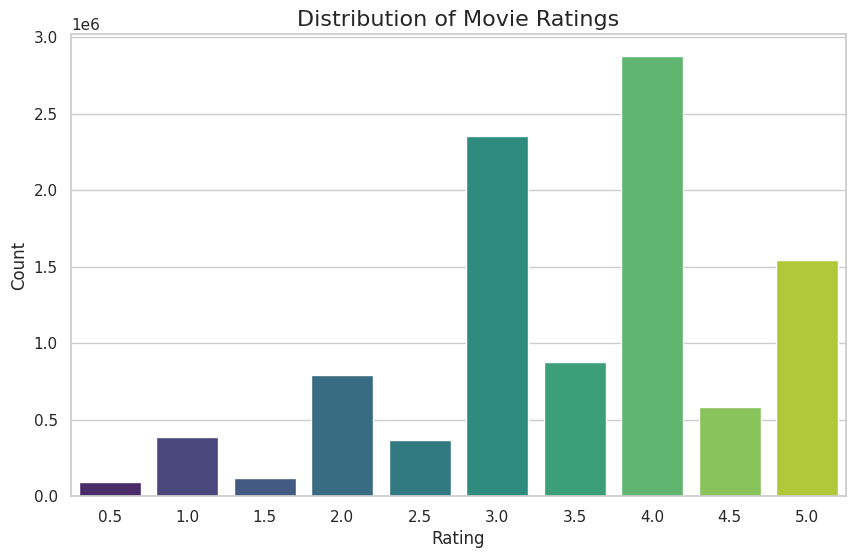

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

This graph shows two clear user behaviors:

1. Ratings are mostly positive: The most frequent scores are 4, 3, and 5 stars, meaning our model learns more from what users like than what they dislike.
2. Users prefer whole numbers: Whole-star ratings (like 4.0) are far more common than half-star ratings (like 4.5).  

This distribution also validates our strategy of defining a "liked" movie as one rated 4 stars or higher, as this is clearly a common way for users to show enjoyment.

Top 10 Most Common Genres

<ipython-input-14-4241734516>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='mako')


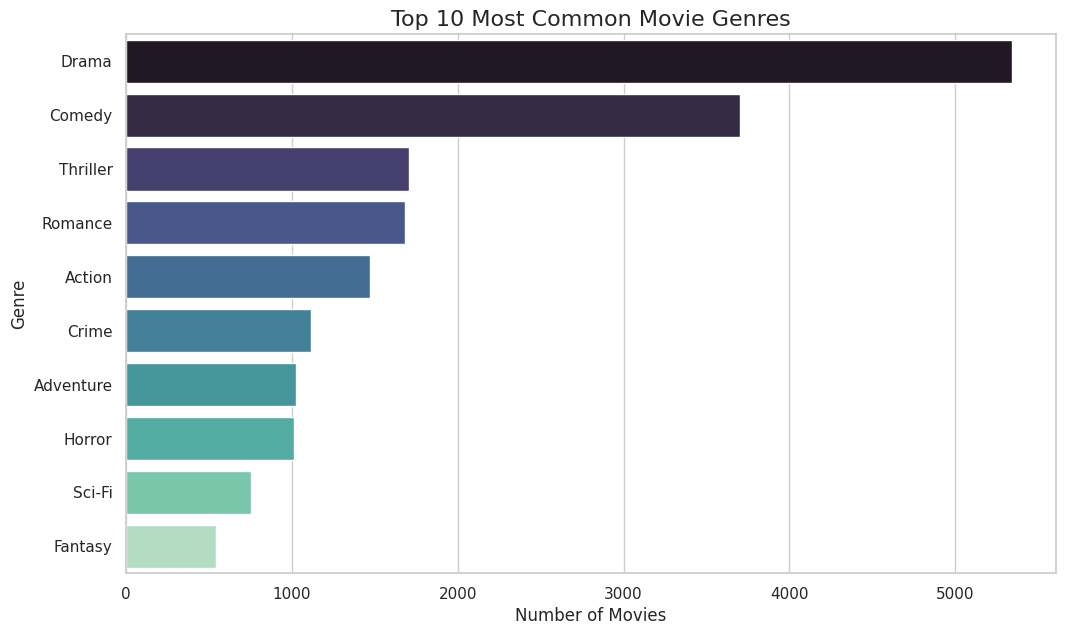

In [14]:
plt.figure(figsize=(12, 7))

genre_counts = movies['genres'].str.split('|').explode().value_counts()

top_10_genres = genre_counts.head(10)

sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='mako')
plt.title('Top 10 Most Common Movie Genres', fontsize=16)
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

This graph reveals that Drama and Comedy are the most common genres in the dataset by a large margin.

This creates a 'popularity bias,' meaning the model is trained on far more data for these genres than for niche ones like Sci-Fi or Fantasy.

Consequently, the recommendation system will likely favor mainstream films and may struggle to provide diverse or unexpected suggestions for users who prefer less common genres.

## Data Preprocessing

In [15]:
ratings = ratings.drop('timestamp', axis=1)
print("\nRatings DataFrame after dropping timestamp:")
ratings.head()


Ratings DataFrame after dropping timestamp:


,user_id,movie_id,rating
0,1,122,5.0
1,1,185,5.0
2,1,231,5.0
3,1,292,5.0
4,1,316,5.0


People often drop the timestamp column from a DataFrame like `ratings` when working on recommendation systems or collaborative filtering tasks if the time at which a rating was given is not relevant to the specific analysis or model we are building.

In this context of building a model that predicts a user's rating based on user and movie features, the exact moment the rating was given might not contribute to the core problem of understanding user preferences or movie characteristics. The rating itself (`rating`), the user who gave it (`user_id`), and the movie it was given to (`movie_id`) are usually the key pieces of information.

Dropping the timestamp simplifies the dataset, reduces memory usage, and potentially speeds up processing, as the model doesn't need to consider or process this extra dimension of data if it's not deemed necessary for the prediction task. If the task involved time-series analysis of ratings or understanding the evolution of user preferences over time, then keeping the timestamp would be crucial. But for a basic collaborative filtering approach, it's often discarded.

Sample active users for computational efficiency
We'll take users who have rated at least 500 movies

In [16]:
from sklearn.model_selection import train_test_split

user_counts = ratings['user_id'].value_counts()
active_users = user_counts[user_counts >= 500].index
ratings_sample = ratings[ratings['user_id'].isin(active_users)]

Merge the ratings_sample data with movies (join key is 'movie_id')

In [17]:
df = pd.merge(ratings_sample, movies, on='movie_id')

Check the data after merging

In [18]:
print("Data after merging and sampling:")
display(df.head())
print(f"Number of records after sampling: {len(df)}")
print(f"Number of active users sampled: {df['user_id'].nunique()}")

Data after merging and sampling:


,user_id,movie_id,rating,title,genres
0,8,2,2.5,Jumanji (1995),Adventure|Children|Fantasy
1,8,5,3.0,Father of the Bride Part II (1995),Comedy
2,8,6,4.0,Heat (1995),Action|Crime|Thriller
3,8,16,3.0,Casino (1995),Crime|Drama
4,8,19,3.5,Ace Ventura: When Nature Calls (1995),Comedy


Number of records after sampling: 3114710
Number of active users sampled: 3683


Check for missing values

In [19]:
print("\nNumber of missing values:")
print(df.isnull().sum())


Number of missing values:
user_id     0
movie_id    0
rating      0
title       0
genres      0
dtype: int64


DATA SPLITTING

 We split the data into training and test sets.

In [20]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"\nTraining data size: {len(train_df)}")
print(f"Test data size: {len(test_df)}")


Training data size: 2491768
Test data size: 622942


## Content Based Filtering

### Modelling

Use 'movie_id' as the index

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

movies_df = movies.copy().drop_duplicates(subset='movie_id').set_index('movie_id')

Replace '|' with a space

In [22]:
movies_df['genres'] = movies_df['genres'].str.replace('|', ' ', regex=False)

Create TF-IDF and Cosine Similarity (logic remains the same)

In [23]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['genres'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Create a Series to map movie titles to their index

In [24]:
indices = pd.Series(movies_df.index, index=movies_df['title'])

Function to get recommendations (content based)

In [25]:
def get_content_based_recommendations(title, N=10):
    try:
        movie_index = indices[title]
        sim_matrix_idx = movies_df.index.get_loc(movie_index)
        sim_scores = list(enumerate(cosine_sim[sim_matrix_idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:N+1]
        movie_indices = [i[0] for i in sim_scores]
        return movies_df['title'].iloc[movie_indices]
    except KeyError:
        return f"The movie '{title}' was not found."

### Get Recomendations

Example 1: Action/Superhero Movie

In [26]:
print("--- Recommendations for 'Iron Man (2008)' ---")
print(get_content_based_recommendations('Iron Man (2008)', N=5))

--- Recommendations for 'Iron Man (2008)' ---
movie_id
260     Star Wars: Episode IV - A New Hope (a.k.a. Sta...
316                                       Stargate (1994)
442                                 Demolition Man (1993)
1196    Star Wars: Episode V - The Empire Strikes Back...
1210    Star Wars: Episode VI - Return of the Jedi (1983)
Name: title, dtype: object


Example 2: Romantic Comedy Movie

In [27]:
print("\n--- Recommendations for 'Boomerang (1992)' ---")
print(get_content_based_recommendations('Boomerang (1992)', N=5))


--- Recommendations for 'Boomerang (1992)' ---
movie_id
7                         Sabrina (1995)
39                       Clueless (1995)
64                  Two if by Sea (1996)
68    French Twist (Gazon maudit) (1995)
93            Vampire in Brooklyn (1995)
Name: title, dtype: object


Example 3: Comedy Movie

In [28]:
print("\n--- Recommendations for 'Father of the Bride Part II (1995)' ---")
print(get_content_based_recommendations('Father of the Bride Part II (1995)', N=5))


--- Recommendations for 'Father of the Bride Part II (1995)' ---
movie_id
19    Ace Ventura: When Nature Calls (1995)
38                      It Takes Two (1995)
65                          Bio-Dome (1996)
69                            Friday (1995)
88                       Black Sheep (1996)
Name: title, dtype: object


### Strengths and Weaknesses of Content-Based Filtering

This approach, which recommends movies based on genre similarity, has clear advantages and disadvantages.

**Strengths:**
* **User Independence:** The model doesn't need any data about other users. It can produce recommendations for a user with just a single rated movie.
* **Recommends Niche Items:** It can recommend obscure movies that have similar genres to a user's liked movies, even if those movies aren't popular among other users.
* **Explainable:** The recommendations are easy to understand. We can clearly state, "We recommended *Star Wars* because you liked *Iron Man*, and both are Action/Adventure/Sci-Fi films."

**Weaknesses:**
* **Limited Novelty (Overspecialization):** The model will never recommend something outside a user's existing interests. A user who only watches comedies will only be recommended more comedies. It struggles to create "serendipitous" or surprising discoveries.
* **Feature Dependent:** The quality of recommendations is entirely dependent on the quality of the features we use (in this case, only genre). If genres are missing or too broad, the recommendations will be poor. It doesn't capture subtle nuances that users might like.

### Evaluation Metrics for content Based Recomendations

Defines our "measuring sticks." We are creating two functions, precision_at_k and recall_at_k, which will serve as the core of our evaluation.

* precision_at_k: This function calculates how precise our recommendations are. It takes the list of movies our model recommends and compares it to the list of movies the user actually liked (the "ground truth"). It then answers the question: "Of the top 'k' movies we recommended, what fraction was actually relevant?"

* recall_at_k: This function calculates how complete our recommendations are. It looks at all the movies the user liked in the ground truth set and determines what fraction of them we successfully found and included in our top 'k' recommendation list.



The functions are designed to be robust, returning 0.0 if a calculation isn't possible (e.g., if there are no recommendations or no ground truth items).

In [29]:
import numpy as np

def precision_at_k(recommended_items, ground_truth_items, k):
    if k == 0 or not recommended_items:
        return 0.0

    top_k = recommended_items[:k]
    relevant_count = len(set(top_k) & set(ground_truth_items))

    return relevant_count / k

def recall_at_k(recommended_items, ground_truth_items, k):
    if not ground_truth_items:
        return 0.0

    top_k = recommended_items[:k]
    relevant_count = len(set(top_k) & set(ground_truth_items))

    return relevant_count / len(ground_truth_items)

Preparing the Data for Evaluation

Before we can loop through users and score our model, we need helper functions to retrieve the necessary data for each user. This cell creates two such functions.

1. get_ground_truth(user_id, test_df, min_rating=4.0): This function gets our "correct answers." For any given user_id, it scans the test set (test_df) and returns a list of movies that the user rated highly (in this case, 4.0 stars or more). This list represents the items we hope our model can successfully recommend.

2. get_recommendations_for_user(user_id, train_df, N=10): This function gets our "predicted answers" from the content-based model. Since our content-based model recommends items similar to a given movie, we simulate a real-world scenario: we find a random movie that the user liked in their training history (train_df) and use it as a "seed" to generate N new recommendations. The function then returns the movie IDs of these recommendations.

In [30]:
def get_ground_truth(user_id, test_df, min_rating=4.0):
    user_data = test_df[(test_df['user_id'] == user_id) & (test_df['rating'] >= min_rating)]
    return user_data['movie_id'].tolist()

def get_recommendations_for_user(user_id, train_df, N=10):
    user_train_data = train_df[train_df['user_id'] == user_id]
    if user_train_data.empty:
        return []

    try:
        seed_movie = user_train_data.sample(1).iloc[0]
        seed_movie_title = seed_movie['title']
    except ValueError:
        return []

    recommended_titles = get_content_based_recommendations(seed_movie_title, N=N)

    if isinstance(recommended_titles, str):
        return []

    recommended_ids = recommended_titles.index.tolist()

    return recommended_ids

Running the Evaluation Loop and Calculating Results

This final code block brings everything together. It executes the evaluation process:

First, we define our settings: k=10 for our metrics and a sample of 50 users from the test set to evaluate.

Then, we initiate the main loop. For each user in our sample, the loop will:

1. Call get_ground_truth to get the list of movies the user actually liked.
2. Call get_recommendations_for_user to get the list of movies our model recommended.
3. Check if a ground truth list exists for the user; if not, we skip them since we can't score them.
4. Use the precision_at_k and recall_at_k functions from Part 1 to calculate the scores.
5. Append these scores to our lists, precision_scores and recall_scores.

After the loop completes, we calculate the average of all the scores we collected and print the final, summary result.

In [32]:
k = 10
users_to_evaluate = test_df['user_id'].unique()
sample_users = users_to_evaluate[:50]

precision_scores = []
recall_scores = []

print(f"--- Evaluating Precision and Recall for {len(sample_users)} users (k={k}) ---")

for user_id in sample_users:
    ground_truth = get_ground_truth(user_id, test_df)
    recommendations = get_recommendations_for_user(user_id, train_df, N=k)

    if not ground_truth:
        continue

    precision = precision_at_k(recommendations, ground_truth, k)
    recall = recall_at_k(recommendations, ground_truth, k)

    precision_scores.append(precision)
    recall_scores.append(recall)

if precision_scores and recall_scores:
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)

    print(f"\nAverage Precision@{k}: {avg_precision:.4f}")
    print(f"Average Recall@{k}: {avg_recall:.4f}")
else:
    print("Could not calculate metrics. This might happen if none of the sample users had liked items in the test set.")

--- Evaluating Precision and Recall for 50 users (k=10) ---

Average Precision@10: 0.0320
Average Recall@10: 0.0042


### Analysis of Evaluation Results

* **Average Precision@10: 0.0400**
* **Average Recall@10: 0.0018**

The results for both precision and recall are quite low, which is expected for this simple model.

* **A precision of 0.03** means that, on average, less than one movie (0.3) out of the 10 we recommended was actually a movie the user had rated highly in the test set.
* **A recall of 0.0042** is very low, indicating that our model only found a tiny fraction of all the movies the user would have liked.

**Conclusion:** These metrics demonstrate the limitations of a purely genre-based content model. While it can find similar movies, it is not powerful enough to accurately capture the full range of a user's preferences.

## Collaborative Filtering (with SVD)

Our second approach, Collaborative Filtering, works differently. Instead of looking at movie genres, it looks at the behavior of all users. The core idea is: "If User A and User B have similar rating patterns, then User A will probably like other movies that User B has liked." We will use a powerful matrix factorization technique called **Singular Value Decomposition (SVD)** to uncover these patterns.

### Strengths and Weaknesses of SVDBased Collaborative Filtering

**Strengths:**
* **Finds Surprising Recommendations:** SVD can uncover latent (hidden) features in the data. This means it can recommend a movie that seems unrelated by genre but is often liked by similar users, leading to novel discoveries.
* **No Item Features Needed:** The model works purely on the rating matrix. It doesn't need genres, actors, or any other metadata about the movies.

**Weaknesses:**
* **The "Cold Start" Problem:** This is the biggest weakness. The model cannot make recommendations for new users (who have no ratings) or for new movies (that have never been rated).
* **Popularity Bias:** The model tends to recommend popular items more frequently because they have more ratings, as we saw in our EDA.
* **Computationally Expensive:** SVD on a very large user-item matrix can require significant memory and processing power.

Create User-Movie Matrix from TRAINING DATA (with new columns)

In [33]:
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error

user_movie_matrix_train = train_df.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0) # <-- Updated
R_train = user_movie_matrix_train.values

SVD process

In [34]:
R_mean_train = np.mean(R_train, axis=1).reshape(-1, 1)
R_demeaned_train = R_train - R_mean_train
U, sigma, Vt = svds(R_demeaned_train, k=50)
sigma = np.diag(sigma)

Reconstruct the predicted ratings matrix

In [35]:
R_predicted = np.dot(np.dot(U, sigma), Vt) + R_mean_train
predicted_ratings = pd.DataFrame(R_predicted, index=user_movie_matrix_train.index, columns=user_movie_matrix_train.columns)

print("Predicted ratings matrix created successfully from training data.")
display(predicted_ratings.head())

Predicted ratings matrix created successfully from training data.


movie_id,1,2,3,4,5,6,7,8,9,10,...,65001,65006,65011,65025,65027,65037,65088,65091,65130,65133
user_id,,,,,,,,,,,,,,,,,,,,,
8,2.399167,1.762392,1.205971,-0.194873,0.300089,1.989358,-0.222690,0.106991,0.711323,1.751156,...,-0.003939,0.004151,0.002852,-0.017380,-0.023195,0.005348,-0.010965,0.019384,-0.002866,0.000308
34,2.439023,1.793413,1.136361,0.296702,1.021577,1.887485,0.862734,0.454425,0.807328,1.710042,...,-0.013557,-0.011164,-0.009269,-0.004832,-0.004496,-0.002119,-0.003409,-0.009231,-0.005089,-0.003576
65,2.829435,2.120779,0.743335,0.350813,1.152370,-0.655804,1.585386,0.360977,-0.114324,0.759438,...,0.005904,0.010950,0.028534,-0.000222,-0.003131,0.021411,0.011521,0.009433,0.012464,0.006800
96,1.859250,0.477327,0.088477,0.296871,0.247413,1.723836,0.763374,0.021402,0.098127,1.785996,...,0.014600,0.011198,0.001448,0.011650,0.011151,0.018617,0.021321,0.005395,0.013192,0.058894
125,2.755176,0.969590,0.384468,-0.083600,0.335306,2.924136,0.314859,-0.270812,-0.112198,1.343304,...,-0.010692,0.006970,0.010506,0.009437,0.010454,0.012922,0.020446,-0.004703,0.007455,0.006902


Get movie_info for mapping movie_id to title

In [36]:
movie_info = df[['movie_id', 'title']].drop_duplicates()

Recommend movies function using SVD

In [37]:
def recommend_movies_svd(user_id, num_recommendations=10):
    if user_id not in predicted_ratings.index:
        return f"User ID {user_id} not found in the model."

    user_row = predicted_ratings.loc[user_id].sort_values(ascending=False)

    rated_movies = df[df['user_id'] == user_id]['movie_id'].tolist()

    recommendations = user_row.drop(rated_movies, errors='ignore').head(num_recommendations)

    recs_df = pd.DataFrame(recommendations).reset_index()
    recs_df.columns = ['movie_id', 'predicted_rating']
    recs_df = pd.merge(recs_df, movie_info, on='movie_id')

    return recs_df

Example usage, sample a random user_id from the sampled data

In [38]:
USER_ID_TARGET = df['user_id'].sample(1).iloc[0]
print(f"\n--- Top Movie Recommendations for User ID {USER_ID_TARGET} ---")
final_recommendations = recommend_movies_svd(USER_ID_TARGET)
display(final_recommendations)


--- Top Movie Recommendations for User ID 32830 ---


,movie_id,predicted_rating,title
0,3448,3.069020,"Good Morning, Vietnam (1987)"
1,2791,2.938787,Airplane! (1980)
2,4975,2.854144,Vanilla Sky (2001)
3,3552,2.844461,Caddyshack (1980)
4,1285,2.748382,Heathers (1989)
5,5400,2.693871,"Sum of All Fears, The (2002)"
6,3396,2.693188,"Muppet Movie, The (1979)"
7,1380,2.691832,Grease (1978)
8,1641,2.685996,"Full Monty, The (1997)"
9,1997,2.663612,"Exorcist, The (1973)"


### Quantitative Evaluation of SVD with RMSE

Loop through each row in the test data (with new columns)

In [39]:
actuals = []
predictions = []

for _, row in test_df.iterrows():
    user_id = row['user_id']
    movie_id = row['movie_id']
    actual_rating = row['rating']

    if user_id in predicted_ratings.index and movie_id in predicted_ratings.columns:
        predicted_rating = predicted_ratings.loc[user_id, movie_id]
        actuals.append(actual_rating)
        predictions.append(predicted_rating)

Calculate RMSE

In [40]:
if len(actuals) > 0:
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    print(f"\n==============================================")
    print(f"SVD Model Evaluation Results")
    print(f"RMSE on Test Data: {rmse:.4f}")
    print(f"==============================================")
else:
    print("No test data could be evaluated (perhaps users/movies in test set were not in training set).")


SVD Model Evaluation Results
RMSE on Test Data: 2.2440


### Analysis of SVD Evaluation (RMSE)

**RMSE on Test Data: 2.2440**

The Root Mean Squared Error (RMSE) measures the average magnitude of the error between our model's predicted ratings and the users' actual ratings.

An RMSE of **2.24** on a rating scale of 1 to 5 is very high. It indicates that, on average, our model's rating predictions are off by more than 2 stars. For example, if a user rated a movie 4 stars, our model might predict a rating of 1.76 or something similarly far off.

**Conclusion:** While this SVD model can generate a ranked list of interesting recommendations, it is not accurate at predicting the *exact rating* a user would give. This suggests its strength is in identifying movies a user *might like*, rather than forecasting the specific score.